In [1]:
import json
import keras
import pandas as pd
import keras.preprocessing.text as kpt
from keras.preprocessing.text import Tokenizer
import numpy as np

import matplotlib.pyplot as plt

# Import libraries
import seaborn as sns
import nltk 
# nltk.download()
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
# import these modules 
from nltk.stem import WordNetLemmatizer 

In [2]:
data = pd.read_csv('nlp-getting-started/train.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [3]:
data_after_null_removal = data.copy()
#data_after_null_removal = data_after_null_removal.dropna(subset=['location'])
# Removing duplicates
data_after_duplicate_removal = data_after_null_removal.drop_duplicates(subset=['text'])

nltk.download('stopwords')
#punctutation removal
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

data_afer_punctuation_removal = data_after_duplicate_removal.copy()
data_afer_punctuation_removal['text'] = data_afer_punctuation_removal['text'].apply(lambda x: clean_text(x))

# Tockenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tockenized_data = data_afer_punctuation_removal.copy()
tockenized_data['text'] = tockenized_data['text'].apply(lambda x: tokenization(x.lower()))

# stopword removal 
data_after_stopword_removal = tockenized_data.copy()
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

data_after_stopword_removal['text'] = data_after_stopword_removal['text'].apply(lambda x: remove_stopwords(x))

# return to string
data_without_tockenization = data_after_stopword_removal.copy()
def listToString(s):     
    # initialize an empty string 
    str1 = " " 
    # return string   
    return (str1.join(s)) 
        
data_without_tockenization['text'] = data_without_tockenization['text'].apply(lambda x: listToString(x))
data_without_tockenization

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/patrick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officers evacuation shelter place orders expected,1
3,6,NaN,NaN,people receive wildfires evacuation orders california,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pours school,1
...,...,...,...,...,...
7604,10863,NaN,NaN,worldnews fallen powerlines glink tram update fire crews evacuated passengers tr,1
7605,10864,NaN,NaN,flip side im walmart bomb everyone evacuate stay tuned blow,1
7606,10866,NaN,NaN,suicide bomber kills saudi security site mosque reuters via world google news wall,1
7608,10869,NaN,NaN,two giant cranes holding bridge collapse nearby homes,1


In [4]:
def clean(tweet):

    #correct some acronyms while we are at it
    tweet = re.sub(r"tnwx", "tennessee weather", tweet)
    tweet = re.sub(r"azwx", "arizona weather", tweet)  
    tweet = re.sub(r"alwx", "alabama weather", tweet)
    tweet = re.sub(r"wordpressdotcom", "wordpress", tweet)      
    tweet = re.sub(r"gawx", "georgia weather", tweet)  
    tweet = re.sub(r"scwx", "south carolina weather", tweet)  
    tweet = re.sub(r"cawx", "california weather", tweet)
    tweet = re.sub(r"usnwsgov", "united states national weather service", tweet) 
    tweet = re.sub(r"MH370", "malaysia airlines flight 370", tweet)
    tweet = re.sub(r"okwx", "oklahoma city weather", tweet)
    tweet = re.sub(r"arwx", "arkansas weather", tweet)  
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)  
    tweet = re.sub(r"amirite", "am i right", tweet)
    
    #and some typos/abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"usagov", "usa government", tweet)
    tweet = re.sub(r"recentlu", "recently", tweet)
    tweet = re.sub(r"ph0tos", "photos", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    tweet = re.sub(r"amageddon", "armageddon", tweet)
    tweet = re.sub(r"trfc", "traffic", tweet)
    tweet = re.sub(r"windStorm", "wind storm", tweet)
    tweet = re.sub(r"16yr", "16 year", tweet)
    tweet = re.sub(r"traumatised", "traumatized", tweet)
    
    #hashtags and usernames
    tweet = re.sub(r"radiation%20emergency","radiation emergency", tweet)
    tweet = re.sub(r"forest%20fire","forest fire", tweet)
    tweet = re.sub(r"war%Ozone","war zone", tweet)
    tweet = re.sub(r"bush%20fires","bush fires", tweet)
    tweet = re.sub(r"burning%20buildings","burning buildings", tweet)
    tweet = re.sub(r"first%20responders","first responders", tweet)
    tweet = re.sub(r"irandeal", "iran deal", tweet)
    tweet = re.sub(r"arianagrande", "ariana grande", tweet)
    tweet = re.sub(r"camilacabello97", "camila cabello", tweet) 
    tweet = re.sub(r"rondarousey", "ronda rousey", tweet)     
    tweet = re.sub(r"mtvhottest", "mtv hottest", tweet)
    tweet = re.sub(r"trapmusic", "trap music", tweet)
    tweet = re.sub(r"prophetmuhammad", "prophet Mmuhammad", tweet)
    tweet = re.sub(r"PantherAttack", "panther attack", tweet)
    tweet = re.sub(r"strategicpatience", "strategic patience", tweet)
    tweet = re.sub(r"socialnews", "social news", tweet)
    tweet = re.sub(r"idps:", "internally displaced people :", tweet)
    tweet = re.sub(r"artistsUnited", "artists united", tweet)
    tweet = re.sub(r"claytonBryant", "clayton bryant", tweet)
    tweet = re.sub(r"uk", "united kingdom", tweet)
    tweet = re.sub(r"usa", "united states of america", tweet)
    tweet = re.sub(r"ny", "new york", tweet)
    tweet = re.sub(r"newcastleupontyne", "newcastle upon tyne", tweet)
    tweet = re.sub(r"jimmyfallon", "jimmy fallon", tweet)
    tweet = re.sub(r"justinbieber", "justin bieber", tweet)
    tweet = re.sub(r"time2015", "time 2015", tweet)
    tweet = re.sub(r"djicemoon", "dj icemoon", tweet)
    tweet = re.sub(r"livingsafely", "living safely", tweet)
    tweet = re.sub(r"fifa16", "fifa 2016", tweet)
    tweet = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", tweet)
    tweet = re.sub(r"bbcnews", "bbc news", tweet)
    tweet = re.sub(r"undergroundrailraod", "underground railraod", tweet)
    tweet = re.sub(r"c4news", "c4 news", tweet)
    tweet = re.sub(r"mudslide", "mud slide", tweet)
    tweet = re.sub(r"nosurrender", "no surrender", tweet)
    tweet = re.sub(r"notexplained", "not explained", tweet)
    tweet = re.sub(r"greatbritishbakeoff", "great british bake off", tweet)
    tweet = re.sub(r"londonfire", "london fire", tweet)
    tweet = re.sub(r"kotaweather", "kota weather", tweet)
    tweet = re.sub(r"luchaunderground", "lucha underground", tweet)
    tweet = re.sub(r"koin6news", "koin 6 news", tweet)
    tweet = re.sub(r"liveOnK2", "live on K2", tweet)
    tweet = re.sub(r"9newsgoldcoast", "9 news gold coast", tweet)
    tweet = re.sub(r"nikeplus", "nike plus", tweet)
    tweet = re.sub(r"david_cameron", "david cameron", tweet)
    tweet = re.sub(r"peterjukes", "peter jukes", tweet)
    tweet = re.sub(r"mikeparractor", "michael parr", tweet)
    tweet = re.sub(r"4playthursdays", "foreplay thursdays", tweet)
    tweet = re.sub(r"tgf2015", "tonti town grape festival", tweet)
    tweet = re.sub(r"realmandyrain", "mandy rain", tweet)
    tweet = re.sub(r"graysondolan", "grayson dolan", tweet)
    tweet = re.sub(r"apollobrown", "apollo brown", tweet)
    tweet = re.sub(r"saddlebrooke", "saddle brooke", tweet)
    tweet = re.sub(r"tontitowngrape", "tonti town grape", tweet)
    tweet = re.sub(r"abbswinston", "abbs winston", tweet)
    tweet = re.sub(r"shaunKing", "sshaun king", tweet)
    tweet = re.sub(r"meekmill", "meek mill", tweet)
    tweet = re.sub(r"tornadogiveaway", "tornado giveaway", tweet)
    tweet = re.sub(r"grupdates", "gr updates", tweet)
    tweet = re.sub(r"southdowns", "south downs", tweet)
    tweet = re.sub(r"braininjury", "brain injury", tweet)
    tweet = re.sub(r"auspol", "australian politics", tweet)
    tweet = re.sub(r"PlannedParenthood", "Planned Parenthood", tweet)
    tweet = re.sub(r"calgaryweather", "calgary weather", tweet)
    tweet = re.sub(r"weallheartonedirection", "we all heart one direction", tweet)
    tweet = re.sub(r"edsheeran", "ed sheeran", tweet)
    tweet = re.sub(r"trueHeroes", "true heroes", tweet)
    tweet = re.sub(r"complexmag", "complex magazine", tweet)
    tweet = re.sub(r"theadvocatemag", "the advocate magazine", tweet)
    tweet = re.sub(r"cityofcalgary", "city of calgary", tweet)
    tweet = re.sub(r"ebolaoutbreak", "ebola outbreak", tweet)
    tweet = re.sub(r"summerfate", "summer fate", tweet)
    tweet = re.sub(r"ramag", "royal academy magazine", tweet)
    tweet = re.sub(r"offers2go", "offers to go", tweet)
    tweet = re.sub(r"modiministry", "modi ministry", tweet)
    tweet = re.sub(r"taxiways", "taxi ways", tweet)
    tweet = re.sub(r"calum5sos", "calum hood", tweet)
    tweet = re.sub(r"jamesmelville", "james melville", tweet)
    tweet = re.sub(r"jamaicaobserver", "jamaica observer", tweet)
    tweet = re.sub(r"tweetlikeitsseptember11th2001", "tweet like it is september 11th 2001", tweet)
    tweet = re.sub(r"cbplawyers", "cbp lawyers", tweet)
    tweet = re.sub(r"fewmoretweets", "few more tweets", tweet)
    tweet = re.sub(r"blacklivesmatter", "black lives matter", tweet)
    tweet = re.sub(r"nasahurricane", "nasa hurricane", tweet)
    tweet = re.sub(r"onlinecommunities", "online communities", tweet)
    tweet = re.sub(r"humanconsumption", "human consumption", tweet)
    tweet = re.sub(r"typhoon-devastated", "typhoon devastated", tweet)
    tweet = re.sub(r"meat-loving", "meat loving", tweet)
    tweet = re.sub(r"facialabuse", "facial abuse", tweet)
    tweet = re.sub(r"lakecounty", "lake county", tweet)
    tweet = re.sub(r"beingauthor", "being author", tweet)
    tweet = re.sub(r"withheavenly", "with heavenly", tweet)
    tweet = re.sub(r"thanku", "thank you", tweet)
    tweet = re.sub(r"itunesmusic", "itunes music", tweet)
    tweet = re.sub(r"offensivecontent", "offensive content", tweet)
    tweet = re.sub(r"worstsummerjob", "worst summer job", tweet)
    tweet = re.sub(r"harrybecareful", "harry be careful", tweet)
    tweet = re.sub(r"nasasolarsystem", "nasa solar system", tweet)
    tweet = re.sub(r"animalrescue", "animal rescue", tweet)
    tweet = re.sub(r"kurtschlichter", "kurt schlichter", tweet)
    tweet = re.sub(r"throwingknifes", "throwing knives", tweet)
    tweet = re.sub(r"godsLove", "god's love", tweet)
    tweet = re.sub(r"bookboost", "book boost", tweet)
    tweet = re.sub(r"ibooklove", "I book love", tweet)
    tweet = re.sub(r"nestleindia", "nestle india", tweet)
    tweet = re.sub(r"realdonaldtrump", "donald trump", tweet)
    tweet = re.sub(r"davidvonderhaar", "david vonderhaar", tweet)
    tweet = re.sub(r"ceciltheLion", "cecil the lion", tweet)
    tweet = re.sub(r"weathernetwork", "weather network", tweet)
    tweet = re.sub(r"gopdebate", "gop debate", tweet)
    tweet = re.sub(r"rickperry", "rick perry", tweet)
    tweet = re.sub(r"frontpage", "front page", tweet)
    tweet = re.sub(r"newsintweets", "news in tweets", tweet)
    tweet = re.sub(r"viralspell", "viral spell", tweet)
    tweet = re.sub(r"til_now", "until now", tweet)
    tweet = re.sub(r"volcanoinrussia", "volcano in russia", tweet)
    tweet = re.sub(r"zippednews", "Zipped news", tweet)
    tweet = re.sub(r"michelebachman", "michele bachman", tweet)
    tweet = re.sub(r"53inch", "53 inch", tweet)
    tweet = re.sub(r"kerricktrial", "kerrick trial", tweet)
    tweet = re.sub(r"abstorm", "alberta storm", tweet)
    tweet = re.sub(r"beyhive", "beyonce hive", tweet)
    tweet = re.sub(r"rockyfire", "rocky fire", tweet)
    tweet = re.sub(r"listen/buy", "listen or buy", tweet)
    tweet = re.sub(r"artistsunited", "artists united", tweet)
    tweet = re.sub(r"engvsaus", "england vs australia", tweet)
    tweet = re.sub(r"scottwalker", "scott walker", tweet)
    tweet = re.sub(r"africanbaze", "african baze", tweet)
    tweet = re.sub(r"engineshed", "engine shed", tweet)
    tweet = re.sub(r"newsnigeria", "nigeria news", tweet)
    return tweet

data_without_tockenization['text'] = data_without_tockenization['text'].apply(clean)
data_without_tockenization

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officers evacuation shelter place orders expected,1
3,6,NaN,NaN,people receive wildfires evacuation orders california,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pours school,1
...,...,...,...,...,...
7604,10863,NaN,NaN,worldnews fallen powerlines glink tram update fire crews evacuated passengers tr,1
7605,10864,NaN,NaN,flip side im walmart bomb everyone evacuate stay tuned blow,1
7606,10866,NaN,NaN,suicide bomber kills saudi security site mosque reuters via world google news wall,1
7608,10869,NaN,NaN,two giant cranes holding bridge collapse nearby homes,1


In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')

porter =  PorterStemmer()

def sentenceStemmer(text):
	words = word_tokenize(text)
	corpus = []
	for word in words:
		corpus.append(porter.stem(word))
		corpus.append(" ")
	#end for
	return "".join(corpus)
#end sentenceStemmer
data_without_tockenization['text'] = data_without_tockenization['text'].apply(lambda x: sentenceStemmer(x))
data_without_tockenization

[nltk_data] Downloading package punkt to /home/patrick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquak may allah forgiv us,1
1,4,NaN,NaN,forest fire near la rong sask canada,1
2,5,NaN,NaN,resid ask shelter place notifi offic evacu shelter place order expect,1
3,6,NaN,NaN,peopl receiv wildfir evacu order california,1
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour school,1
...,...,...,...,...,...
7604,10863,NaN,NaN,worldnew fallen powerlin glink tram updat fire crew evacu passeng tr,1
7605,10864,NaN,NaN,flip side im walmart bomb everyon evacu stay tune blow,1
7606,10866,NaN,NaN,suicid bomber kill saudi secur site mosqu reuter via world googl news wall,1
7608,10869,NaN,NaN,two giant crane hold bridg collaps nearbi home,1


In [6]:
df_new = data_without_tockenization.copy()
df_new['location'].isnull().sum()

2482

In [7]:
df_new['location'].value_counts()

USA                           104
New York                       71
United States                  50
London                         45
Canada                         29
                             ... 
wherever there's netflix        1
Level 3 Garrison, Sector G      1
St. Catharines, Ontario         1
SWinfo@dot.state.al.us          1
Here, there and everywhere      1
Name: location, Length: 3327, dtype: int64

In [8]:
# New dataframe with of missing location features
bool_series = pd.isnull(df_new["location"])
df1 = df_new[bool_series]
df1

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquak may allah forgiv us,1
1,4,NaN,NaN,forest fire near la rong sask canada,1
2,5,NaN,NaN,resid ask shelter place notifi offic evacu shelter place order expect,1
3,6,NaN,NaN,peopl receiv wildfir evacu order california,1
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour school,1
...,...,...,...,...,...
7604,10863,NaN,NaN,worldnew fallen powerlin glink tram updat fire crew evacu passeng tr,1
7605,10864,NaN,NaN,flip side im walmart bomb everyon evacu stay tune blow,1
7606,10866,NaN,NaN,suicid bomber kill saudi secur site mosqu reuter via world googl news wall,1
7608,10869,NaN,NaN,two giant crane hold bridg collaps nearbi home,1


In [9]:
df_new.dropna(subset=['location'], inplace=True)
usa = df1[:497]
new_york = df1[498:994]
united_states = df1[995:1490]
london = df1[1491:1986]
canada = df1[1987:2482]

# filling missing values with top 5 most used locations
usa['location'].fillna('usa', inplace=True)
new_york['location'].fillna('new york', inplace=True)
united_states['location'].fillna('united states', inplace=True)
london['location'].fillna('london', inplace=True)
canada['location'].fillna('canada', inplace=True)

# Merging the dataframes
df2 = usa.append(new_york)
df3 = df2.append(united_states)
df4 = df3.append(london)
df5 = df4.append(canada)
final_df = df_new.append(df5)
final_df

/home/patrick/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,id,keyword,location,text,target
31,48,ablaze,Birmingham,bbcmtd wholesal market ablaz,1
32,49,ablaze,Est. September 2012 - Bristol,alway tri bring heavi metal rt,0
33,50,ablaze,AFRICA,african baze break nigeria news flag set ablaz aba,1
34,52,ablaze,"Philadelphia, PA",cri set ablaz,0
35,53,ablaze,"London, UK",plu side look sky last night ablaz,0
...,...,...,...,...,...
7604,10863,NaN,canada,worldnew fallen powerlin glink tram updat fire crew evacu passeng tr,1
7605,10864,NaN,canada,flip side im walmart bomb everyon evacu stay tune blow,1
7606,10866,NaN,canada,suicid bomber kill saudi secur site mosqu reuter via world googl news wall,1
7608,10869,NaN,canada,two giant crane hold bridg collaps nearbi home,1


In [10]:
#location cleaning cleaning
final_df['location'] = final_df['location'].apply(lambda x: clean_text(x))
final_df['location'] = final_df['location'].apply(lambda x: tokenization(x))
final_df['location'] = final_df['location'].apply(lambda x: remove_stopwords(x))
final_df['location'] = final_df['location'].apply(lambda x: listToString(x))
final_df['location'] = final_df['location'].apply(lambda x: clean(x))
final_df['location'] = final_df['location'].apply(lambda x: sentenceStemmer(x))


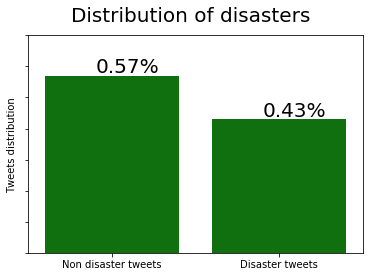

In [11]:
# Target distribution
zeros = round((final_df.target==0).sum()/final_df.shape[0], 2)
ones = round(1-zeros, 2)

sns.barplot(x=["Non disaster tweets","Disaster tweets"], y= [zeros,ones], color='green')

plt.gca().set_ybound(0, 0.7)
plt.gca().set_ylabel('Tweets distribution')
plt.gca().set_yticklabels([])

plt.gca().tick_params(axis='x')

plt.annotate(str(zeros)+'%', xy=(-0.1,zeros+0.01), size=20)
plt.annotate(str(ones)+'%', xy=(0.9,ones+0.01), size=20)
plt.suptitle('Distribution of disasters', size=20)
plt.show()

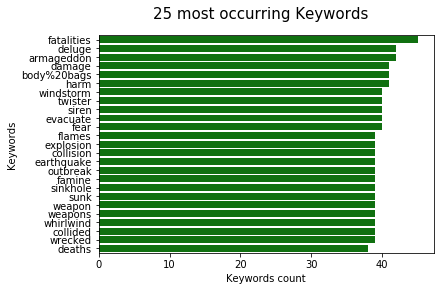

In [12]:
#Top most used keywords
groupby_keyword = final_df[['keyword', 'target']].groupby('keyword')['target'].agg(frequencies= 'mean', count = 'size').reset_index().sort_values(by='count',ascending=False)

sns.barplot(y='keyword', x='count', data=groupby_keyword.iloc[:25], color='green')
plt.gca().set_xlabel('Keywords count')
plt.gca().set_ylabel('Keywords')
plt.suptitle("25 most occurring Keywords", size=15)
plt.show()

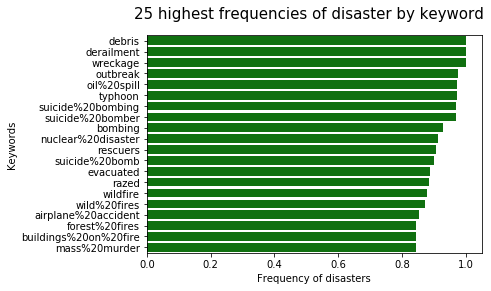

In [13]:
#Words used most in tweets on disasters
groupby_keyword.sort_values(by='frequencies', ascending=False, inplace=True)
sns.barplot(y='keyword', x='frequencies', data=groupby_keyword.iloc[:20], color='green')
plt.gca().set_xlabel('Frequency of disasters')
plt.gca().set_ylabel('Keywords')
plt.suptitle("25 highest frequencies of disaster by keyword", size=15)
plt.show()

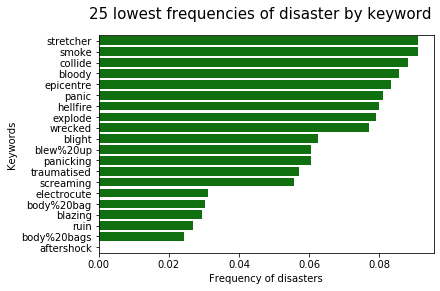

In [14]:
sns.barplot(y='keyword', x='frequencies', data=groupby_keyword.iloc[-20:], color='green')
plt.gca().set_xlabel('Frequency of disasters')
plt.gca().set_ylabel('Keywords')
plt.suptitle("25 lowest frequencies of disaster by keyword", size=15)
plt.show()

Text(0.5, 0.98, 'Words in a tweet')

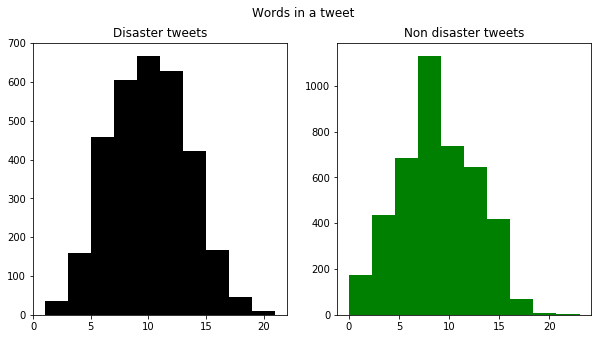

In [15]:
#Number of words in a tweet
fig,(x1,x2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = final_df[final_df['target']==1]['text'].str.split().map(lambda x: len(x))
x1.hist(tweet_len, color='black')
x1.set_title('Disaster tweets')
tweet_len = final_df[final_df['target']==0]['text'].str.split().map(lambda x: len(x))
x2.hist(tweet_len,color='green')
x2.set_title('Non disaster tweets')
fig.suptitle('Words in a tweet')

In [17]:
#!pip install plotly
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

cnt_ = final_df['location'].value_counts()
cnt_.reset_index()
cnt_ = cnt_[:15,]
bar_plot = go.Bar(
                x = cnt_.index,
                y = cnt_.values,
                name = "Number of tweets in dataset according to location",
                marker = dict(color = 'rgba(200, 74, 150, 0.5)',
                             line=dict(color='rgb(255,0,0)',width=1.5)),
                )

data_ = [bar_plot]
layout = go.Layout(barmode = "group",title = 'Number of tweets in dataset according to location')
fig = go.Figure(data = data_, layout = layout)
py.iplot(fig)

In [21]:
final1_df = final_df[final_df["target"]==1]
final0_df = final_df[final_df["target"]==0]
cnt_1 = final1_df['location'].value_counts()
cnt_1.reset_index()
cnt_1 = cnt_1[:20,]

cnt_0 = final0_df['location'].value_counts()
cnt_0.reset_index()
cnt_0 = cnt_0[:20,]

final1_df = go.Bar(
                x = cnt_1.index,
                y = cnt_1.values,
                name = "Number of tweets about real disaster in different locations",
                marker = dict(color = 'rgba(255, 74, 55, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                )
final0_df = go.Bar(
                x = cnt_0.index,
                y = cnt_0.values,
                name = "Number of tweets about fake disaster in different locations",
                marker = dict(color = 'rgba(13, 155, 30, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                )


data_ = [final0_df,final1_df]
layout = go.Layout(barmode = 'stack',title = 'Number of tweets in dataset according to location')
fig = go.Figure(data = data_, layout = layout)
py.iplot(fig)